# Loan Approval Prediction

## 1.Business Problem
### 1.1 Description
automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### 1.2 Sources
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## 2.Machine Learning Problem

### 2.1 Data
#### 2.1.1 Data Overviews
Contain two files 
* <b>train.csv</b>-containing 367 data points</br>
* <b>test.csv</b>-containing 614 data points</br>

#### Attribute-information
<b>Variable</b>-Description<br>
<b>Loan_ID</b>-Unique Loan ID<br>
<b>Gender</b>-Male/ Female<br>
<b>Married</b>-Applicant married (Y/N)<br>
<b>Dependents</b>-Number of dependents<br>
<b>Education</b>-Applicant Education (Graduate/ Under Graduate)<br>
<b>Self_Employed</b>-Self employed (Y/N)<br>
<b>Applicant Income</b>-Applicant income<br>
<b>Coapplicant Income</b>-Coapplicant income<br>
<b>Loan Amount</b>-Loan amount in thousands<br>
<b>Loan_Amount_Term</b>-Term of loan in months<br>
<b>Credit_History</b>-credit history meets guidelines<br>
<b>Property_Area</b>-Urban/ Semi Urban/ Rural<br>
<b>Loan_Status</b>-Loan approved (Y/N)<br>

### 2.2 Mapping the real-world problem to a Machine Learning Problem
#### 2.2.1 Type of Machine Learning Problem
Loan Will approve or not
#### 2.2.2 Performance metric
F1-score

## 3. Machine learning models

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

### 3.1 Data Analysis

In [44]:
#importing train and test files
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [45]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [57]:
print(test_df.shape)
print(test_df.isnull().values.any())

(480, 13)
False


In [58]:
print(train_df.shape)
print(train_df.isnull().values.any())

(480, 13)
False


In [59]:
#dropping the rows which has null value 
train_df = train_df.dropna(how='any',axis=0)

In [60]:
#dropping the rows which has null value 
test_df = train_df.dropna(how='any',axis=0)

In [61]:
#removing the dupilcate apps
train_df.drop_duplicates(subset='Loan_ID', inplace=True)

In [62]:
#removing the dupilcate apps
test_df.drop_duplicates(subset='Loan_ID', inplace=True)

In [63]:
#printing shape after removing the rows which has null values
print(train_df.shape)

(480, 13)


In [64]:
print(test_df.shape)

(480, 13)


In [65]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


Y    332
N    148
Name: Loan_Status, dtype: int64


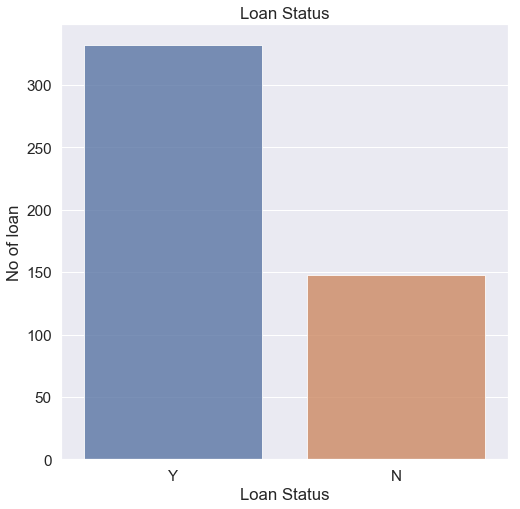

In [66]:
loanStatus=train_df['Loan_Status'].value_counts()
print(loanStatus)
plt.figure(figsize=(8,8))
sns.barplot(loanStatus.index, loanStatus.values, alpha=0.8)
plt.title('Loan Status')
plt.ylabel('No of loan')
plt.xlabel('Loan Status')
plt.show()

Male      394
Female     86
Name: Gender, dtype: int64


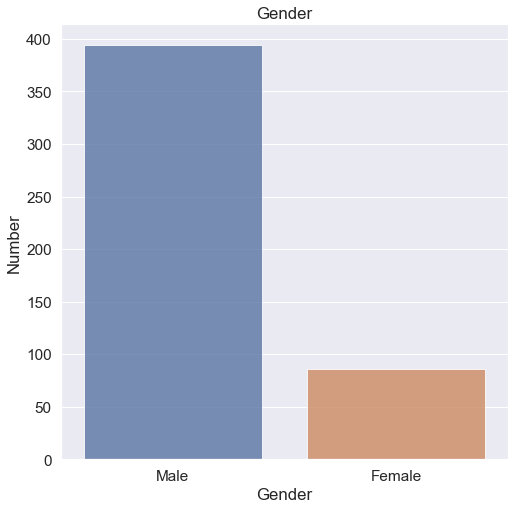

In [67]:
Gender=train_df['Gender'].value_counts()
print(Gender)
plt.figure(figsize=(8,8))
sns.barplot(Gender.index, Gender.values, alpha=0.8)
plt.title('Gender')
plt.ylabel('Number')
plt.xlabel('Gender')
plt.show()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


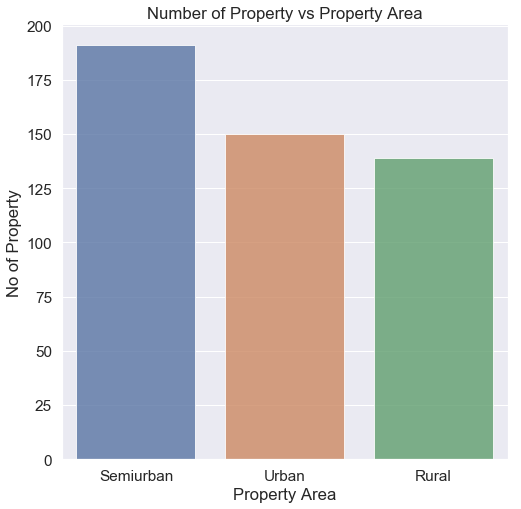

In [68]:
PropertyArea=train_df['Property_Area'].value_counts()
print(PropertyArea)
plt.figure(figsize=(8,8))
sns.barplot(PropertyArea.index, PropertyArea.values, alpha=0.8)
plt.title('Number of Property vs Property Area')
plt.ylabel('No of Property')
plt.xlabel('Property Area')
plt.show()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


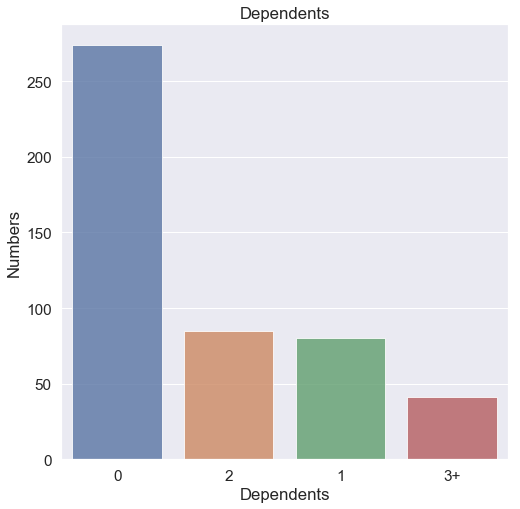

In [69]:
Dependents=train_df['Dependents'].value_counts()
print(Dependents)
plt.figure(figsize=(8,8))
sns.barplot(Dependents.index, Dependents.values, alpha=0.8)
plt.title('Dependents')
plt.ylabel('Numbers')
plt.xlabel('Dependents')
plt.show()

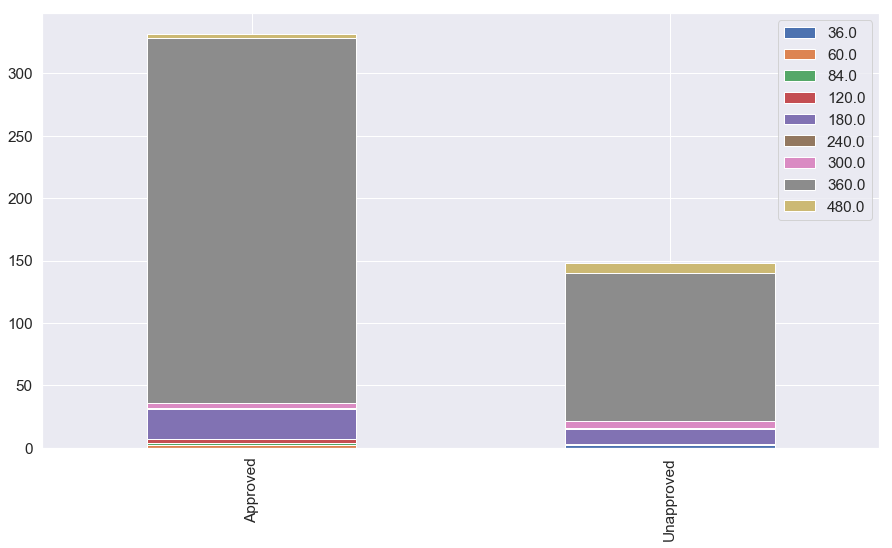

In [70]:
approved_term = train_df[train_df['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = train_df[train_df['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

### 3.2 Features Mapping

#### Gender mapping 
Male=1<br>
Female-0<br>

In [71]:
train_df['Gender']=train_df['Gender'].map({'Male':1,'Female':0})
train_df['Married'] = train_df['Married'].map({'Yes':1,'No':0})

#### Dependents mapping 
Adding new features Singleton,Small_Family,Small_Family<br>
Singleton-1 family member<br>
Small_Family-2 family member<br>
Singleton-3+family member<br>

In [72]:
train_df['Singleton'] = train_df['Dependents'].map(lambda d: 1 if d=='1' else 0)
train_df['Small_Family'] = train_df['Dependents'].map(lambda d: 1 if d=='2' else 0)
train_df['Small_Family'] = train_df['Dependents'].map(lambda d: 1 if d=='3+' else 0)
train_df.drop(['Dependents'], axis=1, inplace=True)

In [73]:
train_df['Property_Area'] = train_df['Property_Area'].map(lambda d: 1 if d=='Rural' else 0)
train_df['Property_Area'] = train_df['Property_Area'].map(lambda d: 1 if d=='Urban' else 0)
train_df['Property_Area'] = train_df['Property_Area'].map(lambda d: 1 if d=='Semiurban' else 0)

#### Education mapping 
Graduate=1<br>
Not Graduate-0<br>

In [74]:
train_df['Education'] = train_df['Education'].map({'Graduate':1,'Not Graduate':0})

#### Self_Employed mapping 
Yes=1<br>
No-0<br>

In [75]:
train_df['Self_Employed'] = train_df['Self_Employed'].map({'Yes':1,'No':0})

### 3.3 Feature Extraction

Features:
- Total_Income :ApplicantIncome+CoapplicantIncome
<br>
<br>
- Debt_Income_Ratio :Total_Income/LoanAmount
<br>

In [76]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [77]:
train_df['Debt_Income_Ratio'] = train_df['Total_Income'] / train_df['LoanAmount']

In [78]:
train_df['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [79]:
test_df['Gender']=test_df['Gender'].map({'Male':1,'Female':0})
test_df['Married'] = test_df['Married'].map({'Yes':1,'No':0})

test_df['Singleton'] = test_df['Dependents'].map(lambda d: 1 if d=='1' else 0)
test_df['Small_Family'] = test_df['Dependents'].map(lambda d: 1 if d=='2' else 0)
test_df['Large_Family'] = test_df['Dependents'].map(lambda d: 1 if d=='3+' else 0)
test_df.drop(['Dependents'], axis=1, inplace=True)

test_df['Property_Area'] = test_df['Property_Area'].map(lambda d: 1 if d=='Rural' else 0)
test_df['Property_Area'] = test_df['Property_Area'].map(lambda d: 1 if d=='Urban' else 0)
test_df['Property_Area'] = test_df['Property_Area'].map(lambda d: 1 if d=='Semiurban' else 0)

test_df['Education'] = test_df['Education'].map({'Graduate':1,'Not Graduate':0})

test_df['Self_Employed'] = test_df['Self_Employed'].map({'Yes':1,'No':0})

test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

test_df['Debt_Income_Ratio'] = test_df['Total_Income'] / test_df['LoanAmount']

test_df['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [ ]:
test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

In [ ]:
test_df['Debt_Income_Ratio'] = test_df['Total_Income'] / train_df['LoanAmount']

In [82]:
test_df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio
1,LP001003,1,1,1,0,128.0,360.0,1.0,0,N,1,0,0,6091.0,47.585938
2,LP001005,1,1,1,1,66.0,360.0,1.0,0,Y,0,0,0,3000.0,45.454545
3,LP001006,1,1,0,0,120.0,360.0,1.0,0,Y,0,0,0,4941.0,41.175000
4,LP001008,1,0,1,0,141.0,360.0,1.0,0,Y,0,0,0,6000.0,42.553191
5,LP001011,1,1,1,1,267.0,360.0,1.0,0,Y,0,1,0,9613.0,36.003745


In [83]:
train_df.drop(['Loan_ID'], axis=1, inplace=True)
y=train_df['Loan_Status']
train_df.drop(['Loan_Status'], axis=1, inplace=True)

test_df.drop(['Loan_ID'], axis=1, inplace=True)
y_test=test_df['Loan_Status']
test_df.drop(['Loan_Status'], axis=1, inplace=True)

test_df.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Singleton,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio
1,1,1,1,0,128.0,360.0,1.0,0,1,0,0,6091.0,47.585938
2,1,1,1,1,66.0,360.0,1.0,0,0,0,0,3000.0,45.454545
3,1,1,0,0,120.0,360.0,1.0,0,0,0,0,4941.0,41.175000
4,1,0,1,0,141.0,360.0,1.0,0,0,0,0,6000.0,42.553191
5,1,1,1,1,267.0,360.0,1.0,0,0,1,0,9613.0,36.003745


Fitting 5 folds for each of 272 candidates, totalling 1360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1360 out of 1360 | elapsed:   24.1s finished
/home/rahulanand/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best HyperParameter:  {'max_depth': 140, 'n_estimators': 14}
0.7938023022591091


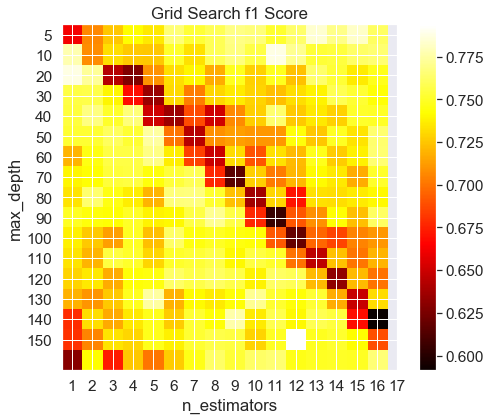

In [85]:
nEstimator = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
depth = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search f1 Score')
plt.show()

Accuracy on test set: 93.958%
Precision on test set: 0.933
Recall on test set: 0.924
F1-Score on test set: 0.928
-------------------- confusion matrix --------------------


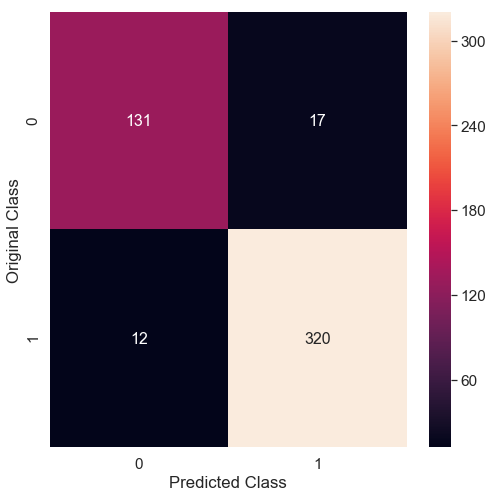

In [86]:
RF= RandomForestClassifier(n_estimators=14,max_depth=140)
RF.fit(X_train,y_train)
y_pred =RF.predict(test_df)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## Final Conclusion
* Accuracy on test set: 93.958%
* Precision on test set: 0.933
* Recall on test set: 0.924
* F1-Score on test set: 0.928